In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
%matplotlib inline

In [199]:
## Day 1
## Time Series EDA

In [3]:
yf.pdr_override()

In [4]:
df = pdr.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(3357, 6)

In [7]:
df.duplicated().sum()

0

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


<Axes: xlabel='Date'>

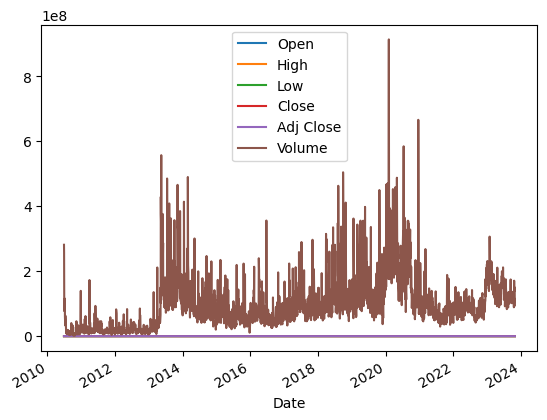

In [9]:
df.plot()

<Axes: xlabel='Date'>

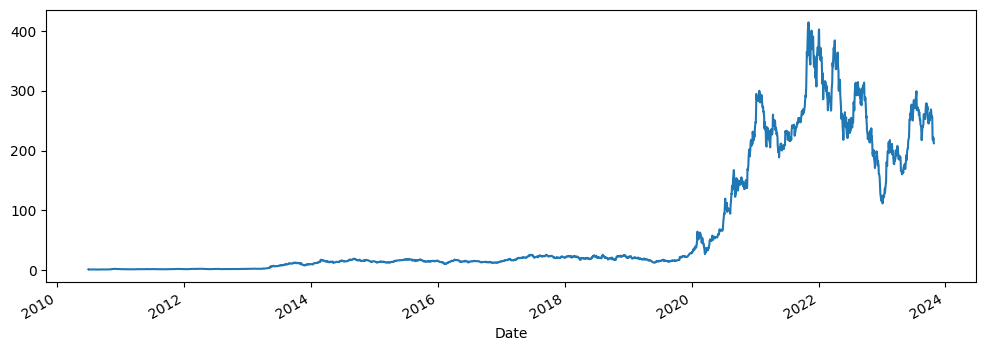

In [10]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

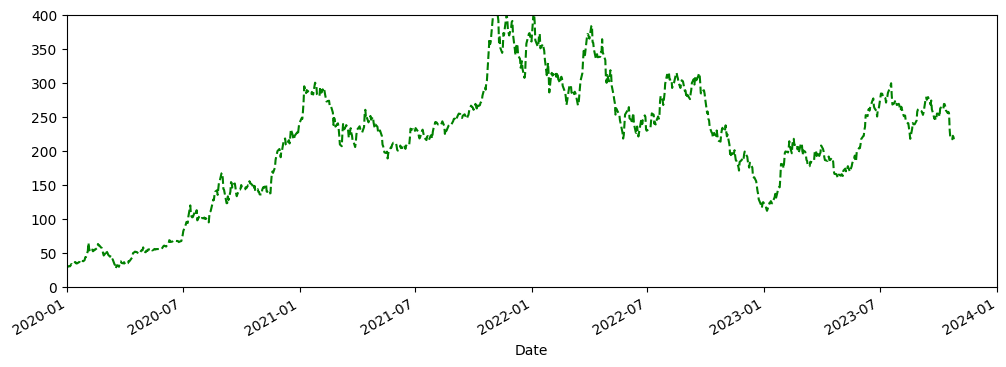

In [11]:
df['High'].plot(xlim=['2020-01-01','2024-01-01'],ylim=[0,400], figsize=(12,4),ls='--', c='green')

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [13]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=3357, freq=None)

In [14]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000


In [15]:
df.iloc[:4,:].index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02'], dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
index = df.loc['2020-01-01':'2020-09-01'].index
share_open = df.loc['2020-01-01':'2020-09-01']['Open']

In [17]:
type(share_open)

pandas.core.series.Series

<Axes: xlabel='Date'>

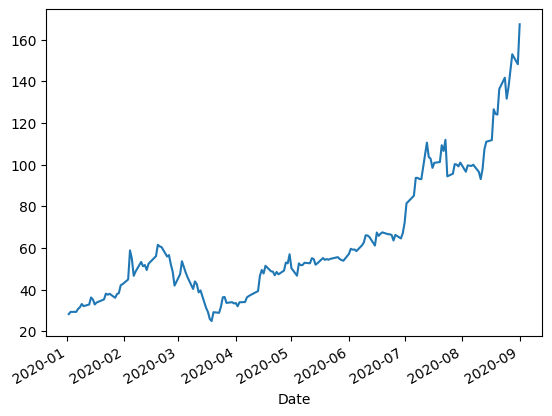

In [18]:
share_open.plot(kind='line')

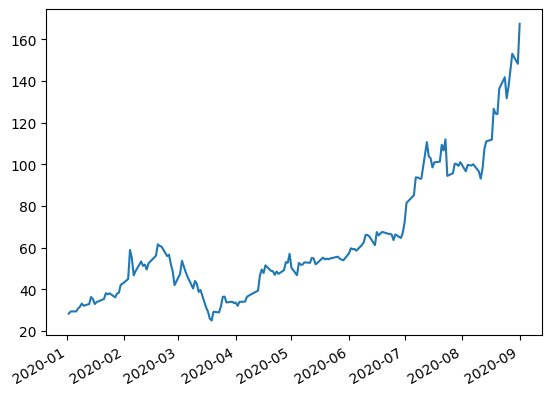

In [19]:
figure, axis = plt.subplots()
# plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [20]:
##DateTime

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [22]:
df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3352,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
3353,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
3354,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
3355,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [25]:
# pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3357 entries, 2010-06-29 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3357 non-null   float64
 1   High       3357 non-null   float64
 2   Low        3357 non-null   float64
 3   Close      3357 non-null   float64
 4   Adj Close  3357 non-null   float64
 5   Volume     3357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 312.6 KB


In [29]:
# df.set_index(df['Date'], drop=True, inplace=True)

In [30]:
# df.drop(columns=['Date'], inplace=True)

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


In [32]:
df.reset_index(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3357 non-null   datetime64[ns]
 1   Open       3357 non-null   float64       
 2   High       3357 non-null   float64       
 3   Low        3357 non-null   float64       
 4   Close      3357 non-null   float64       
 5   Adj Close  3357 non-null   float64       
 6   Volume     3357 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.7 KB


In [34]:
##DateTime

In [35]:
date = datetime.now()

In [36]:
string = date.strftime("%Y-%m-%d %H:%M:%S")

In [37]:
datetime.strptime(string,"%Y-%m-%d %H:%M:%S" )

datetime.datetime(2023, 10, 29, 19, 30)

In [38]:
date.hour

19

In [39]:
date.minute

30

In [40]:
date.second

0

In [41]:
date.day

29

In [42]:
date.month

10

In [43]:
date.year

2023

In [44]:
## Time Resampling

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [46]:
df.set_index('Date', drop=True, inplace=True)

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [75]:
## year end frequency
minimum = df.resample(rule='A').min()

In [54]:
maximum = df.resample(rule='A').max()

In [55]:
type(df.resample(rule='A'))

pandas.core.resample.DatetimeIndexResampler

<Axes: xlabel='Date'>

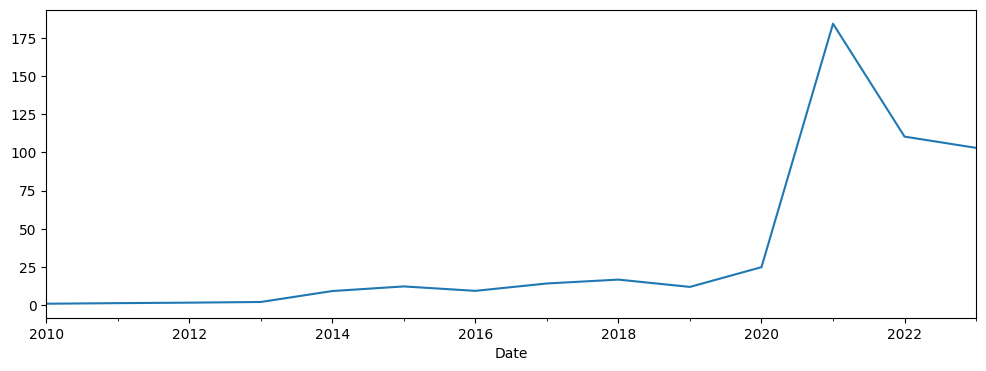

In [61]:
minimum['Open'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

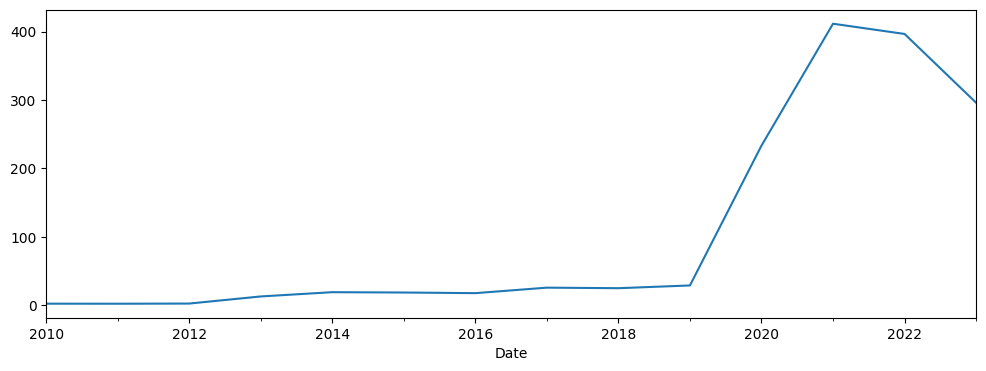

In [62]:
maximum['Open'].plot(figsize=(12,4))

<Axes: xlabel='Date', ylabel='Volume'>

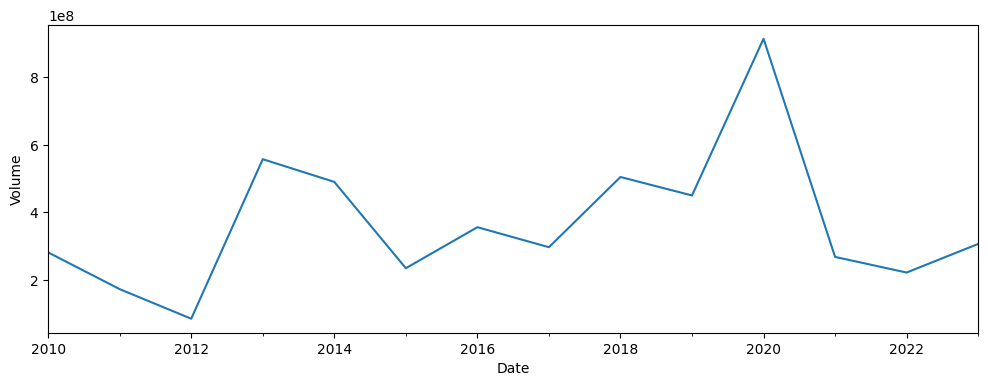

In [74]:
maximum['Volume'].plot(figsize=(12,4), ylabel='Volume')

<Axes: xlabel='Date', ylabel='Volume'>

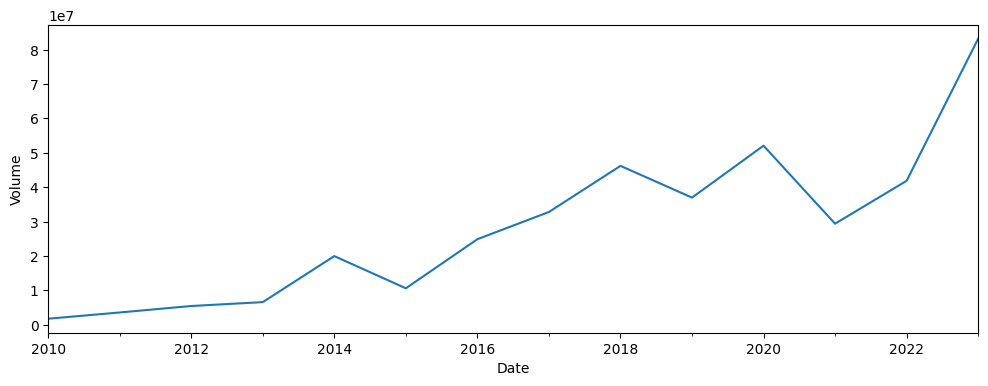

In [67]:
minimum['Volume'].plot(figsize=(12,4), ylabel='Volume')

In [81]:
## Quarterly start frequency

In [86]:
df.resample(rule='qs').max().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-01,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-01,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-01,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-01,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


In [87]:
## Business End Frequency

In [90]:
df.resample(rule='ba').max().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<Axes: xlabel='Date'>

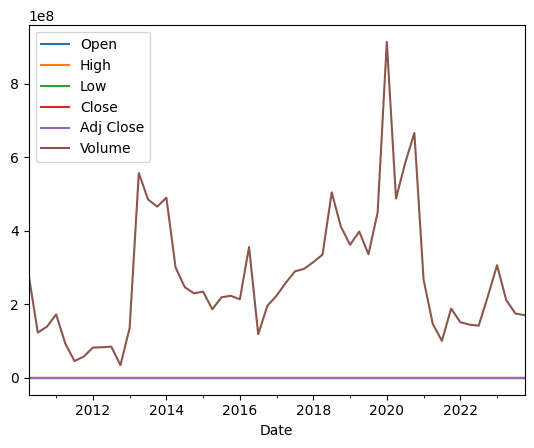

In [96]:
df.resample(rule='bqs').max().plot()

In [97]:
type(df)

pandas.core.frame.DataFrame

In [98]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100


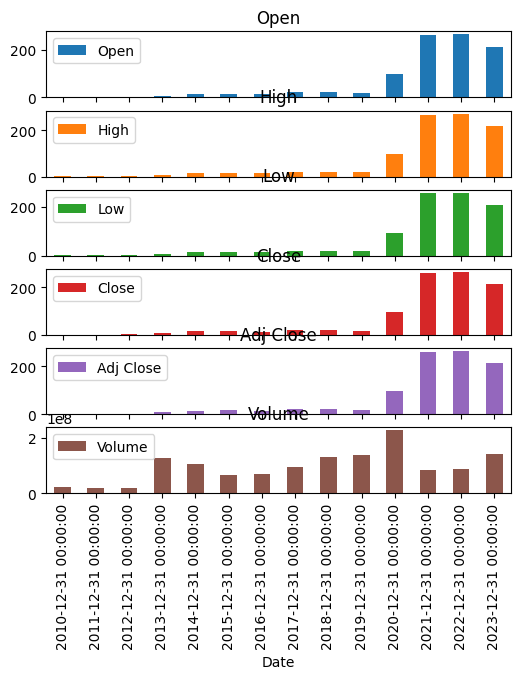

In [117]:
df.resample(rule='A').mean().plot(kind='bar', subplots=True, figsize=(6,6))
figure.autofmt_xdate()

In [124]:
df['High'].rolling(3).min()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01      1.666667
2010-07-02      1.540000
2010-07-06      1.333333
                 ...    
2023-10-23    216.979996
2023-10-24    216.979996
2023-10-25    216.979996
2023-10-26    214.800003
2023-10-27    212.410004
Name: High, Length: 3357, dtype: float64

In [120]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [231]:
df['Open:30 days rolling'] = df['Open'].rolling(30).mean()

In [232]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN


<Axes: xlabel='Date'>

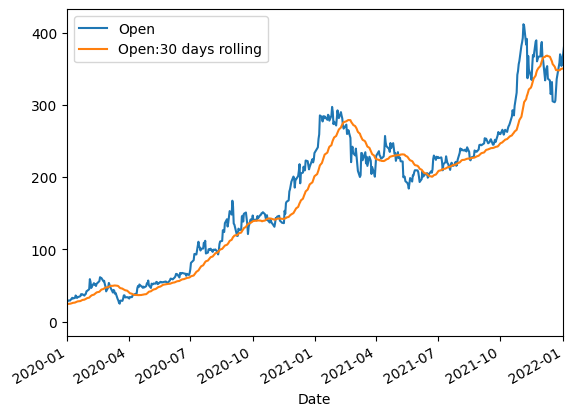

In [233]:
df[['Open','Open:30 days rolling']].plot(xlim=["2020-01-01","2022-01-01"])

In [234]:
## Day 2

In [235]:
## Simple moving average 

<Axes: xlabel='Date'>

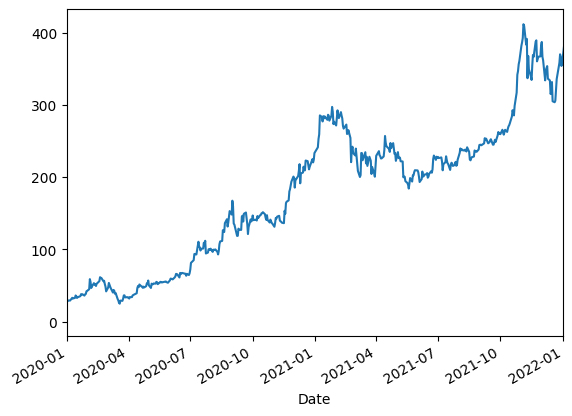

In [236]:
df['Open'].plot(xlim=['2020-01-01','2022-01-01'])

In [253]:
df['Open:20 days rolling'] = df['Open'].rolling(window=20).mean()
df['Open:50 days rolling'] = df['Open'].rolling(window=50).mean()
df['Open:70 days rolling'] = df['Open'].rolling(window=70).mean()

<Axes: xlabel='Date'>

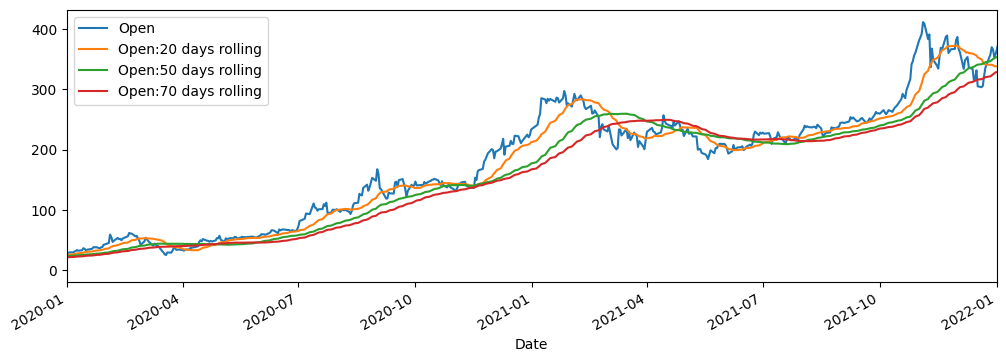

In [260]:
df[['Open','Open:20 days rolling', 'Open:50 days rolling', 'Open:70 days rolling']].plot(xlim=["2020-01-01","2022-01-01"], figsize=(12,4))

In [256]:
df.drop(columns = ['Open:30 days rolling'], inplace=True)

In [257]:
df

,Open,High,Low,Close,Adj Close,Volume,Open:20 days rolling,Open:50 days rolling,Open:70 days rolling
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400,246.984500,248.072201,252.612858
2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100,245.660500,247.688201,251.611000
2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100,244.241501,247.231201,250.550001


In [261]:
## ARIMA MODEL

In [318]:
df = pd.read_csv('C:/Users/91962/Downloads/airline_passengers.csv')

In [319]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [320]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [321]:
df.loc[:1, :]

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0


In [322]:
import statsmodels.api as sms

In [323]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [324]:
df.duplicated().sum()

0

In [325]:
df.dropna(axis=0, inplace =True)

In [326]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [327]:
df.shape

(144, 2)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [329]:
df['Month'] = pd.to_datetime(df['Month'])

In [330]:
df

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [334]:
df.set_index('Month', inplace=True, drop=True)

In [335]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

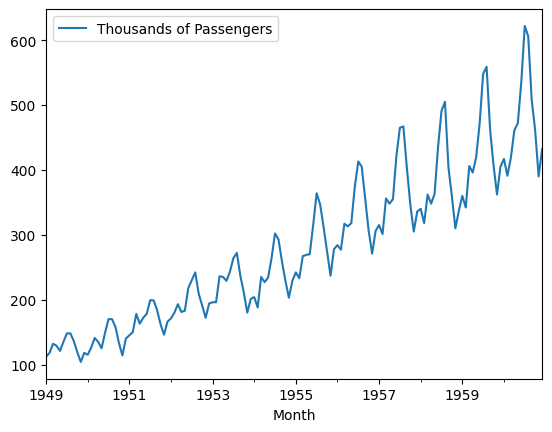

In [336]:
df.plot()

In [338]:
from statsmodels.tsa.stattools import adfuller

In [353]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print("\n")
    print('ADF statistics : {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis, reject the null hypothesis.Time series has no unit root and is stationary. ")
    else:
        print("weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.")

In [354]:
adf_test(df['Thousands of Passengers'])

(0.8153688792060457, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


ADF statistics : 0.8153688792060457
p-value: 0.991880243437641
weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.


In [355]:
## USE DIFFERENCING 

In [356]:
df['Passenger First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [357]:
df

,Thousands of Passengers,Passenger First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [361]:
adf_test(df['Passenger First Difference'].dropna())

(-2.8292668241699963, 0.05421329028382592, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)


ADF statistics : -2.8292668241699963
p-value: 0.05421329028382592
weak evidence against the null hypothesis, Time series has a unit root, and it is not stationary.


In [362]:
df['Passenger Second Difference'] =   df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(2)

In [363]:
adf_test(df['Passenger Second Difference'].dropna())

(-2.9616951355554195, 0.038629757676988855, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 985.7309222414162)


ADF statistics : -2.9616951355554195
p-value: 0.038629757676988855
strong evidence against null hypothesis, reject the null hypothesis.Time series has no unit root and is stationary. 


In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

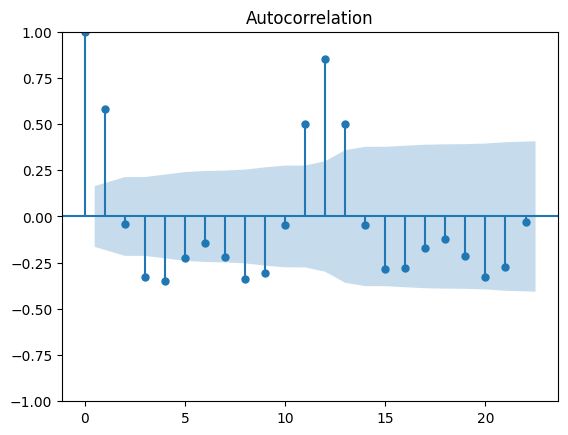

In [366]:
acf = plot_acf(df['Passenger Second Difference'].dropna())

In [367]:
## 12 months

In [368]:
df['Passenger twelve Difference'] =   df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [369]:
adf_test(df['Passenger twelve Difference'].dropna())

(-3.3830207264924814, 0.011551493085514954, 1, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.527129208137)


ADF statistics : -3.3830207264924814
p-value: 0.011551493085514954
strong evidence against null hypothesis, reject the null hypothesis.Time series has no unit root and is stationary. 


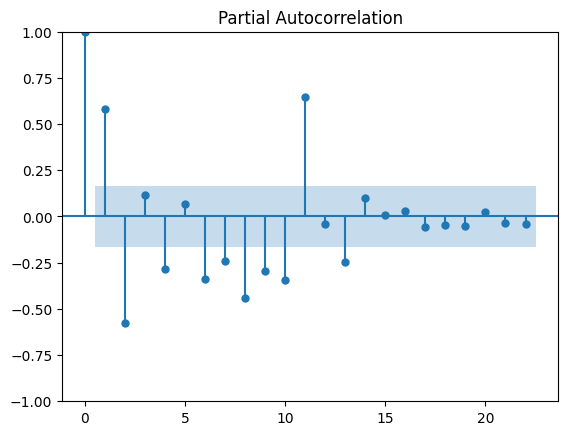

In [376]:
pacf = plot_pacf(df['Passenger Second Difference'].dropna())

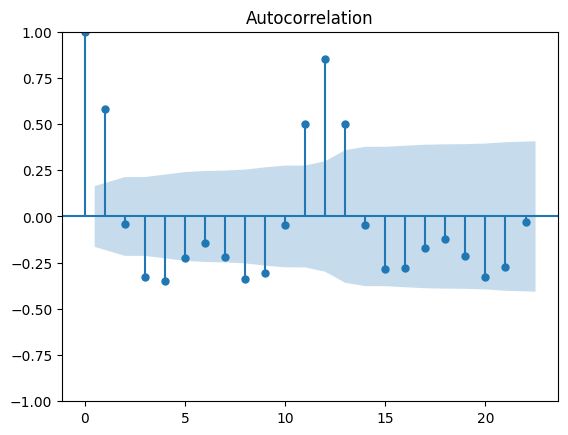

In [377]:
acf = plot_acf(df['Passenger Second Difference'].dropna())

In [379]:
df

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger twelve Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0


In [535]:
from datetime import datetime, timedelta
df.drop(columns = ['Passenger twelve Difference'], inplace=True)

In [536]:
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [537]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [538]:
## predictions

In [539]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [540]:
train_data

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,20.0
1949-04-01,129.0,-3.0,11.0
1949-05-01,121.0,-8.0,-11.0
...,...,...,...
1955-08-01,347.0,-17.0,32.0
1955-09-01,312.0,-35.0,-52.0
1955-10-01,274.0,-38.0,-73.0


In [541]:
test_data

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference
Month,,,
1956-01-01,284.0,6.0,47.0
1956-02-01,277.0,-7.0,-1.0
1956-03-01,317.0,40.0,33.0
1956-04-01,313.0,-4.0,36.0
1956-05-01,318.0,5.0,1.0
1956-06-01,374.0,56.0,61.0
1956-07-01,413.0,39.0,95.0
1956-08-01,405.0,-8.0,31.0
1956-09-01,355.0,-50.0,-58.0


In [542]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [543]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [544]:
from statsmodels.tsa.arima.model import ARIMA 

In [579]:
model = ARIMA(train_data['Thousands of Passengers'], order=(10,2,8))

C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [580]:
model = model.fit()

C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [581]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 8)   Log Likelihood                -318.849
Date:                     Mon, 30 Oct 2023   AIC                            675.698
Time:                             19:37:56   BIC                            721.425
Sample:                         01-01-1949   HQIC                           694.056
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1324      0.258      0.514      0.607      -0.372       0.637
ar.L2         -0.8367      0.176     -4.766      0.000      -1.181      -0.493
ar.L3         -0.2095      0.254     -0.825      0.409      -0.707       0.288
ar.L4         -0.4058      0.204     -1.991      0.046      -0.805      -0.006
ar.L5         -0.5978      0.242     -2.470      0.014      -1.072      -0.123
ar.L6         -0.1229      0.243     -0.507      0.613      -0.598       0.353
ar.L7         -0.6682      0.192     -3.479      0.001      -1.045      -0.292
ar.L8         -0.3102      0.258     -1.203      0.229      -0.816       0.195
ar.L9         -0.3755      0.168     -2.237      0.025      -0.705      -0.046
ar.L10        -0.6296      0.207     -3.043      0.002      -1.035      -0.224
ma.L1         -1.4202      0.302     -4.703      0.000      -2.012      -0.828
ma.L2          1.1141      0.480      2.319      0.020       0.172       2.056
ma.L3         -0.6095      0.490     -1.243      0.214      -1.571       0.352
ma.L4         -0.0620      0.461     -0.134      0.893      -0.965       0.841
ma.L5          0.7445      0.394      1.889      0.059      -0.028       1.517
ma.L6         -1.0888      0.454     -2.396      0.017      -1.979      -0.198
ma.L7          0.8867      0.478      1.854      0.064      -0.051       1.824
ma.L8         -0.4344      0.271     -1.606      0.108      -0.965       0.096
sigma2       147.3988     41.853      3.522      0.000      65.369     229.429
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.41   Prob(JB):                         0.85
Heteroskedasticity (H):               2.34   Skew:                            -0.13
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [582]:
pred = model.predict(start=pred_start_date, end= pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

In [583]:
residuals

Month
1956-01-01     0.913713
1956-02-01     2.141446
1956-03-01    20.914022
1956-04-01    10.826621
1956-05-01    15.719649
1956-06-01    21.666497
1956-07-01    19.437433
1956-08-01    25.488042
1956-09-01     1.968396
1956-10-01    -1.002034
1956-11-01   -12.414785
1956-12-01    -3.342287
1957-01-01    -6.942320
1957-02-01    -9.983829
1957-03-01    29.526996
1957-04-01    13.819292
1957-05-01    15.052800
1957-06-01    33.590808
1957-07-01    39.108569
1957-08-01    52.728432
1957-09-01    18.268868
1957-10-01     0.407540
1957-11-01   -18.900073
1957-12-01    -9.651342
1958-01-01   -17.661043
1958-02-01   -29.919661
1958-03-01     4.718452
1958-04-01   -18.627623
1958-05-01   -14.589831
1958-06-01    11.466968
1958-07-01    31.955584
1958-08-01    56.953717
1958-09-01   -15.804918
1958-10-01   -25.880914
1958-11-01   -54.753545
1958-12-01   -45.045657
1959-01-01   -33.498792
1959-02-01   -42.027361
1959-03-01    16.901704
1959-04-01    -3.458285
1959-05-01     5.236568
1959-06-01

<Axes: ylabel='Density'>

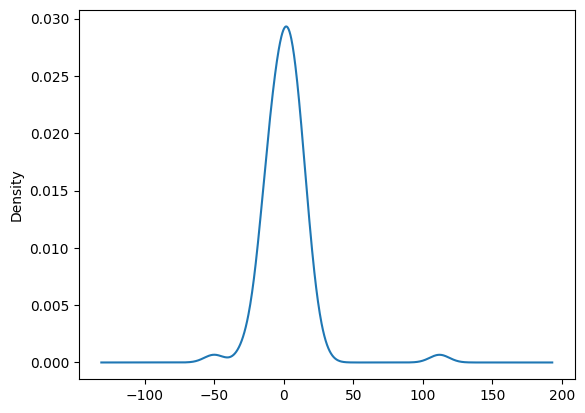

In [588]:
model.resid.plot(kind='kde')

In [585]:
test_data['Predicted_ARIMA'] = pred

C:\Users\91962\AppData\Local\Temp\ipykernel_6252\284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<Axes: xlabel='Month'>

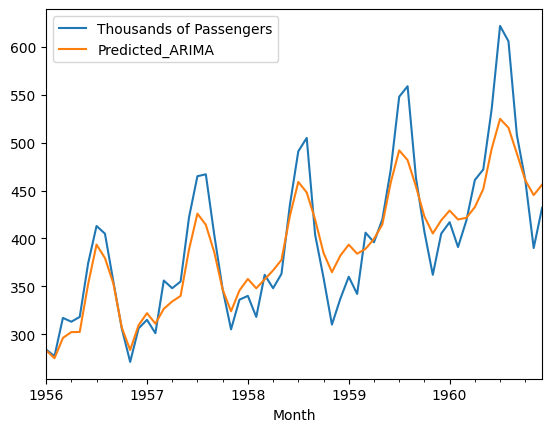

In [586]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [587]:
model.resid

Month
1949-01-01    112.000000
1949-02-01    -50.021180
1949-03-01      7.974423
1949-04-01    -15.332100
1949-05-01     -6.820735
                 ...    
1955-08-01     -0.521722
1955-09-01     -5.960464
1955-10-01     -5.753565
1955-11-01    -12.900545
1955-12-01     11.651492
Length: 84, dtype: float64

<Axes: xlabel='Month'>

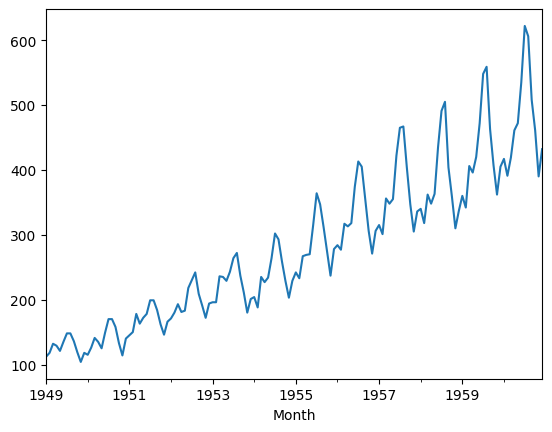

In [468]:
df['Thousands of Passengers'].plot()

In [460]:
df['Thousands of Passengers']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Thousands of Passengers, Length: 144, dtype: float64

In [461]:
df['Passenger First Difference']

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passenger First Difference, Length: 144, dtype: float64

<Axes: xlabel='Month'>

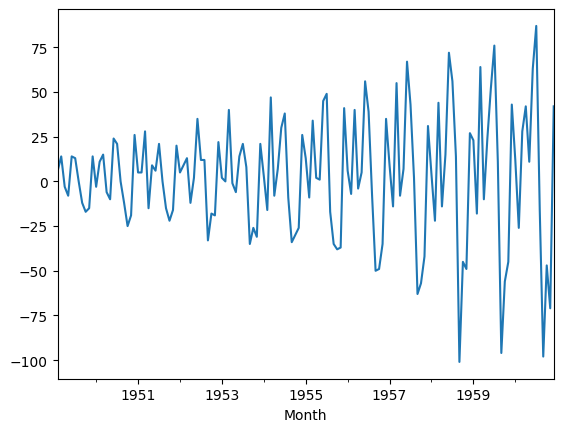

In [563]:
df['Passenger First Difference'].dropna().plot()

<Axes: xlabel='Month'>

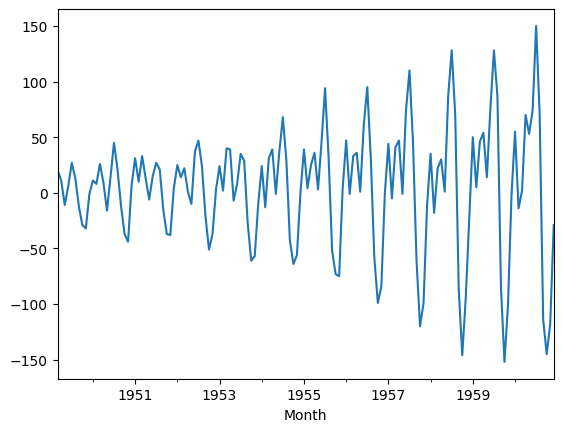

In [564]:
df['Passenger Second Difference'].dropna().plot()

In [475]:
df[df['Passenger First Difference'] == 0]

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger twelve Difference
Month,,,,
1949-08-01,148.0,0.0,13.0,NaN
1950-08-01,170.0,0.0,21.0,22.0
1951-08-01,199.0,0.0,21.0,29.0
1953-02-01,196.0,0.0,2.0,16.0


In [487]:
df.loc['1949-07-01':'1949-09-01']

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference,Passenger twelve Difference
Month,,,,
1949-07-01,148.0,13.0,27.0,NaN
1949-08-01,148.0,0.0,13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [566]:
acf = 

,Thousands of Passengers,Passenger First Difference,Passenger Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,20.0
1949-04-01,129.0,-3.0,11.0
1949-05-01,121.0,-8.0,-11.0
...,...,...,...
1960-08-01,606.0,-16.0,71.0
1960-09-01,508.0,-98.0,-114.0
1960-10-01,461.0,-47.0,-145.0


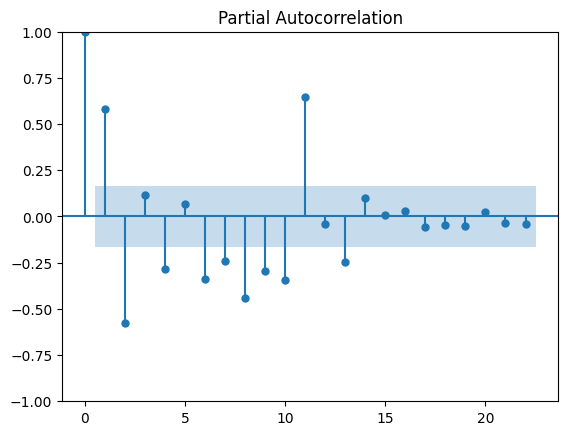

In [567]:
pacf = plot_pacf(df['Passenger Second Difference'].dropna())

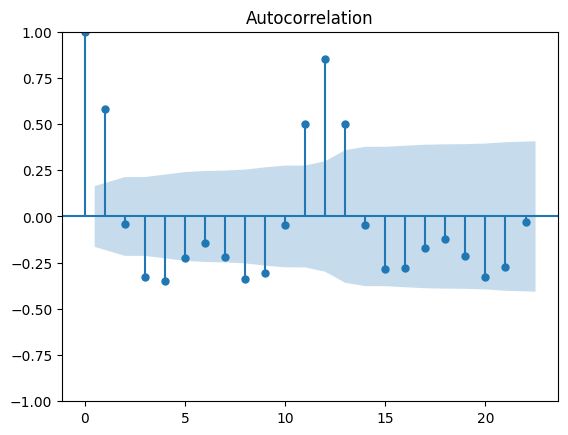

In [569]:
acf = plot_acf(df['Passenger Second Difference'].dropna())

In [589]:
## DAY 4

In [795]:
df = pd.read_csv("C:/Users/91962/Downloads/perrin-freres-monthly-champagne-.csv")

In [796]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [797]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [798]:
df.dropna(inplace=True)

In [799]:
df.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [800]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'}, inplace=True)

In [801]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [802]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [803]:
df.duplicated().sum()

0

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [805]:
df.set_index('Month', drop=True, inplace=True)

In [806]:
df.index = pd.to_datetime(df.index)

In [807]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [808]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [809]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

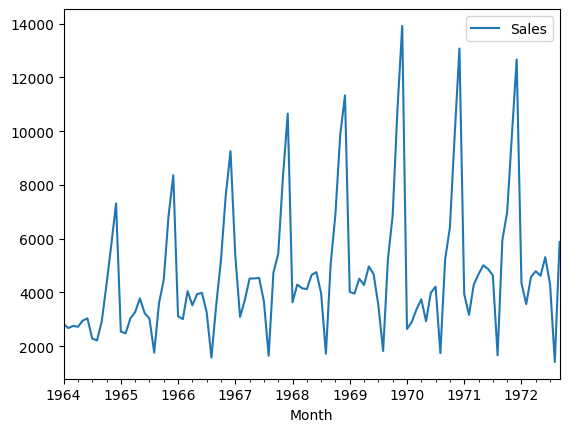

In [810]:
df.plot()

In [811]:
from statsmodels.tsa.stattools import adfuller

In [812]:
test_result = adfuller(df['Sales'])

In [813]:
test_result[1]

0.3639157716602467

In [814]:
test_result[0]

-1.8335930563276195

In [815]:
test_result[2]

11

In [816]:
test_result[3]

93

In [817]:
## DIFFERENCING

In [818]:
df['Seasonal Difference'] = df['Sales'] - df['Sales'].shift(12)

In [819]:
df

,Sales,Seasonal Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [820]:
test_result = adfuller(df['Seasonal Difference'].dropna())
test_result[1]

2.060579696813685e-11

In [821]:
df

,Sales,Seasonal Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [822]:
test_result = adfuller(df['Seasonal Difference'].dropna())

In [823]:
print("ADF test statistics: {}".format(test_result[0]))

ADF test statistics: -7.626619157213164


In [824]:
print("p-value: {}".format(test_result[1]))

p-value: 2.060579696813685e-11


In [825]:
print("lags used: {}".format(test_result[2]))

lags used: 0


In [826]:
print("Number of observations: {}".format(test_result[3]))

Number of observations: 92


<Axes: xlabel='Month'>

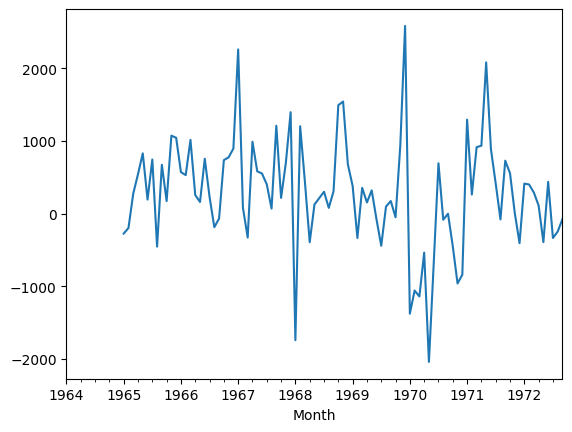

In [827]:
df['Seasonal Difference'].plot()

In [828]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

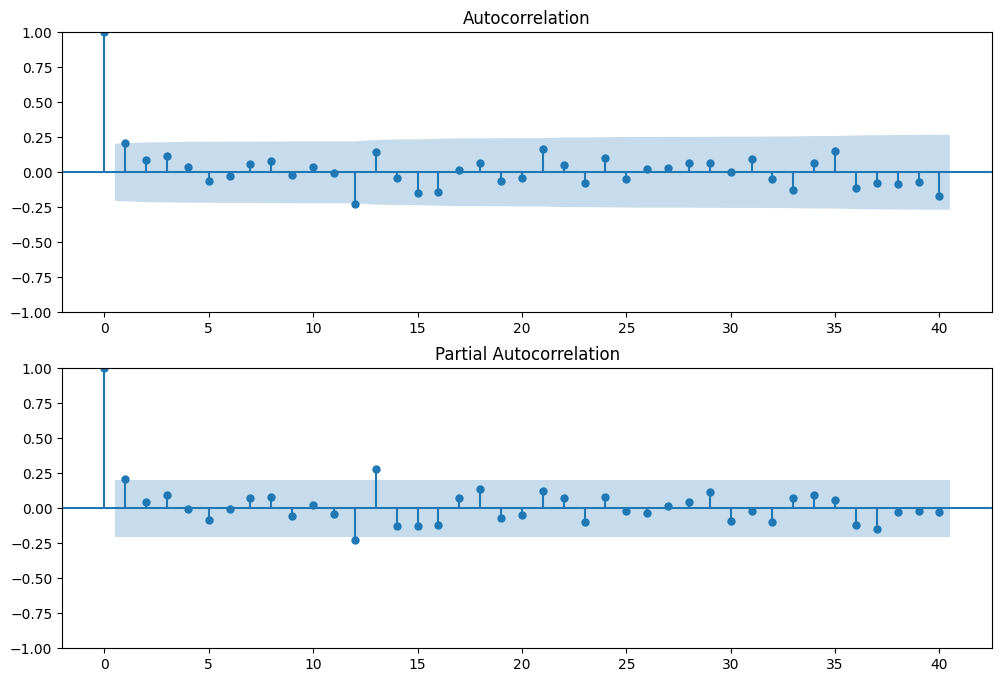

In [829]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Difference'].iloc[13:], lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [830]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [831]:
model = SARIMAX(df['Sales'],order = (1,1,1), seasonal_order=(1,1,1,12))
fitted = model.fit()

C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91962\anaconda3\envs\new_en\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [832]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 30 Oct 2023   AIC                           1486.804
Time:                                    21:25:28   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

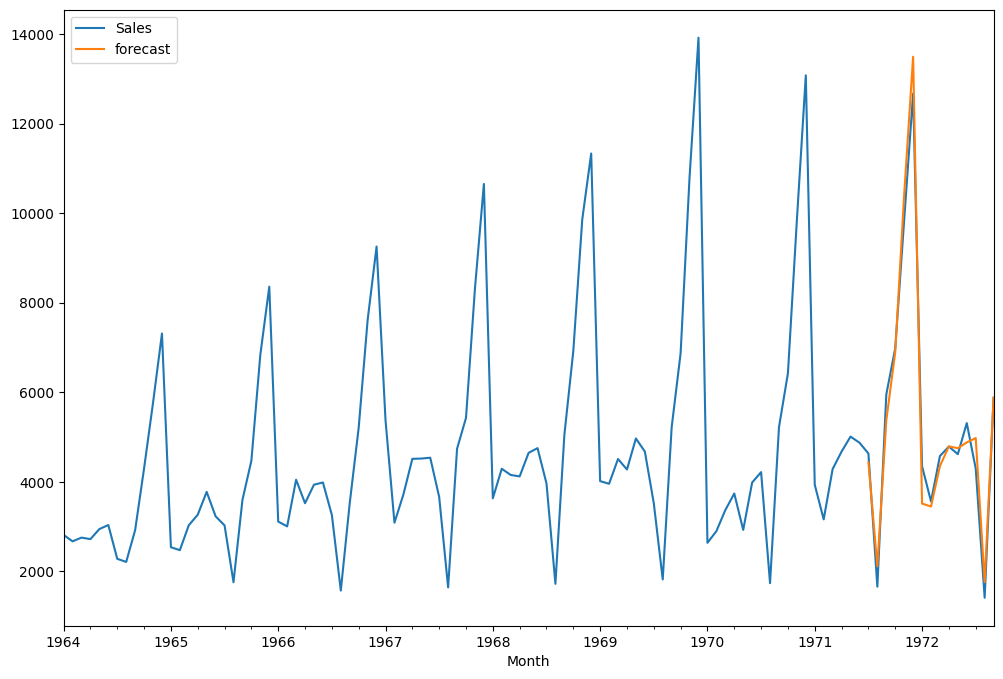

In [898]:
df['forecast'] = fitted.predict(start = 90, end=104)
df[['Sales','forecast']].plot(figsize=(12,8))

In [899]:
df.tail()

,Sales,Seasonal Difference,forecast
Month,,,
1972-05-01,4618.0,-392.0,4751.313024
1972-06-01,5312.0,438.0,4881.451443
1972-07-01,4298.0,-335.0,4977.891831
1972-08-01,1413.0,-246.0,1761.633230
1972-09-01,5877.0,-74.0,5878.711989


In [900]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [901]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [902]:
future_df = pd.DataFrame(index=future_dates, columns = df.columns)

In [903]:
future_df

,Sales,Seasonal Difference,forecast
1972-09-01,NaN,NaN,NaN
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN


In [904]:
future_df = pd.concat([df,future_df])

In [905]:
future_df.head()

,Sales,Seasonal Difference,forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


<Axes: >

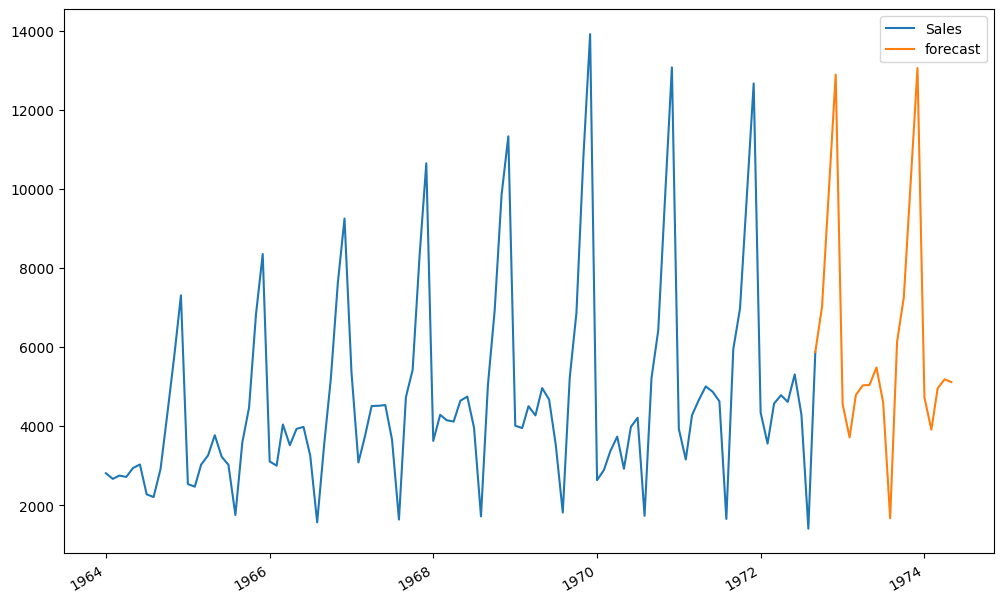

In [906]:
future_df['forecast'] = fitted.predict(start=104, end= 124)
future_df[['Sales','forecast']].plot(figsize=(12,8))


In [907]:
df.head()

,Sales,Seasonal Difference,forecast
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


In [908]:
df.tail()

,Sales,Seasonal Difference,forecast
Month,,,
1972-05-01,4618.0,-392.0,4751.313024
1972-06-01,5312.0,438.0,4881.451443
1972-07-01,4298.0,-335.0,4977.891831
1972-08-01,1413.0,-246.0,1761.633230
1972-09-01,5877.0,-74.0,5878.711989


In [909]:
future_df[future_df['forecast'].notnull() == True]

,Sales,Seasonal Difference,forecast
1972-09-01,5877.0,-74.0,5878.711989
1972-09-01,NaN,NaN,5878.711989
1972-10-01,NaN,NaN,7023.698933
1972-11-01,NaN,NaN,9996.175731
1972-12-01,NaN,NaN,12891.997947
1973-01-01,NaN,NaN,4561.379825
1973-02-01,NaN,NaN,3718.694868
1973-03-01,NaN,NaN,4792.240206
1973-04-01,NaN,NaN,5034.490179
1973-05-01,NaN,NaN,5047.836531
